<a href="https://colab.research.google.com/github/Thisuli-Amanethmi/ML-CW/blob/main/Machine%20Learning%20CourseWork%20-%20US%20Census%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

print("---------------------")

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
X.head(30) # independent variables

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [5]:
y.head(30) # dependent variable

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


# **Data Exploration**

In [6]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


According to the above information, there are missing values in 3 columns. They are,
 1.  workclass - 47 879
 2.  occupation - 47876
 3.  native-country - 48 568

In total there should be 48 842 entries.

**Value count function** --> "?" represent a missing value

In [8]:
X['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [10]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [11]:
X['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [12]:
X['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [13]:
X['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [14]:
X['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [15]:
X['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [16]:
y['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

# **Data Visualization**

(for raw data)

In [17]:
# combing both X and y into a single dataframe
data = X.copy()
data['income'] = y

data.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [18]:
data.corr() # for numerical data

# values greater than 0 - positive correlation (X increase = Y increase)
# values closer to +1 - stronger positive correlation

# values less than 0 - negative correlation (X increate = Y decrease)
# values closer to 11 - stronger negative correlation

# values near 0 - no correlation


<ipython-input-18-1ad4b2e0f1e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # for numerical data


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<ipython-input-19-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

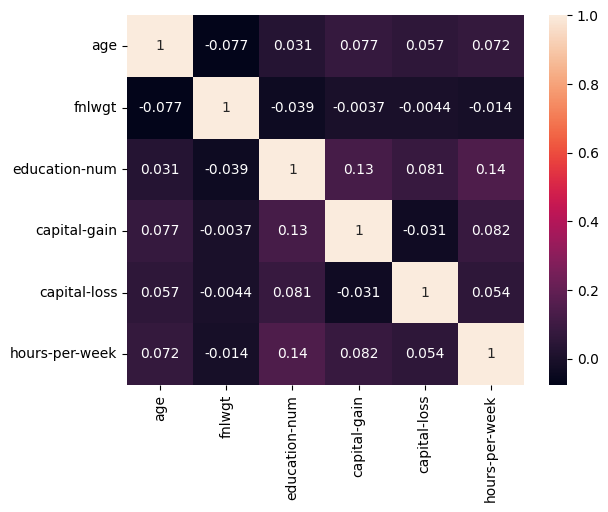

In [19]:
sns.heatmap(data.corr(), annot=True)

<Axes: xlabel='income', ylabel='count'>

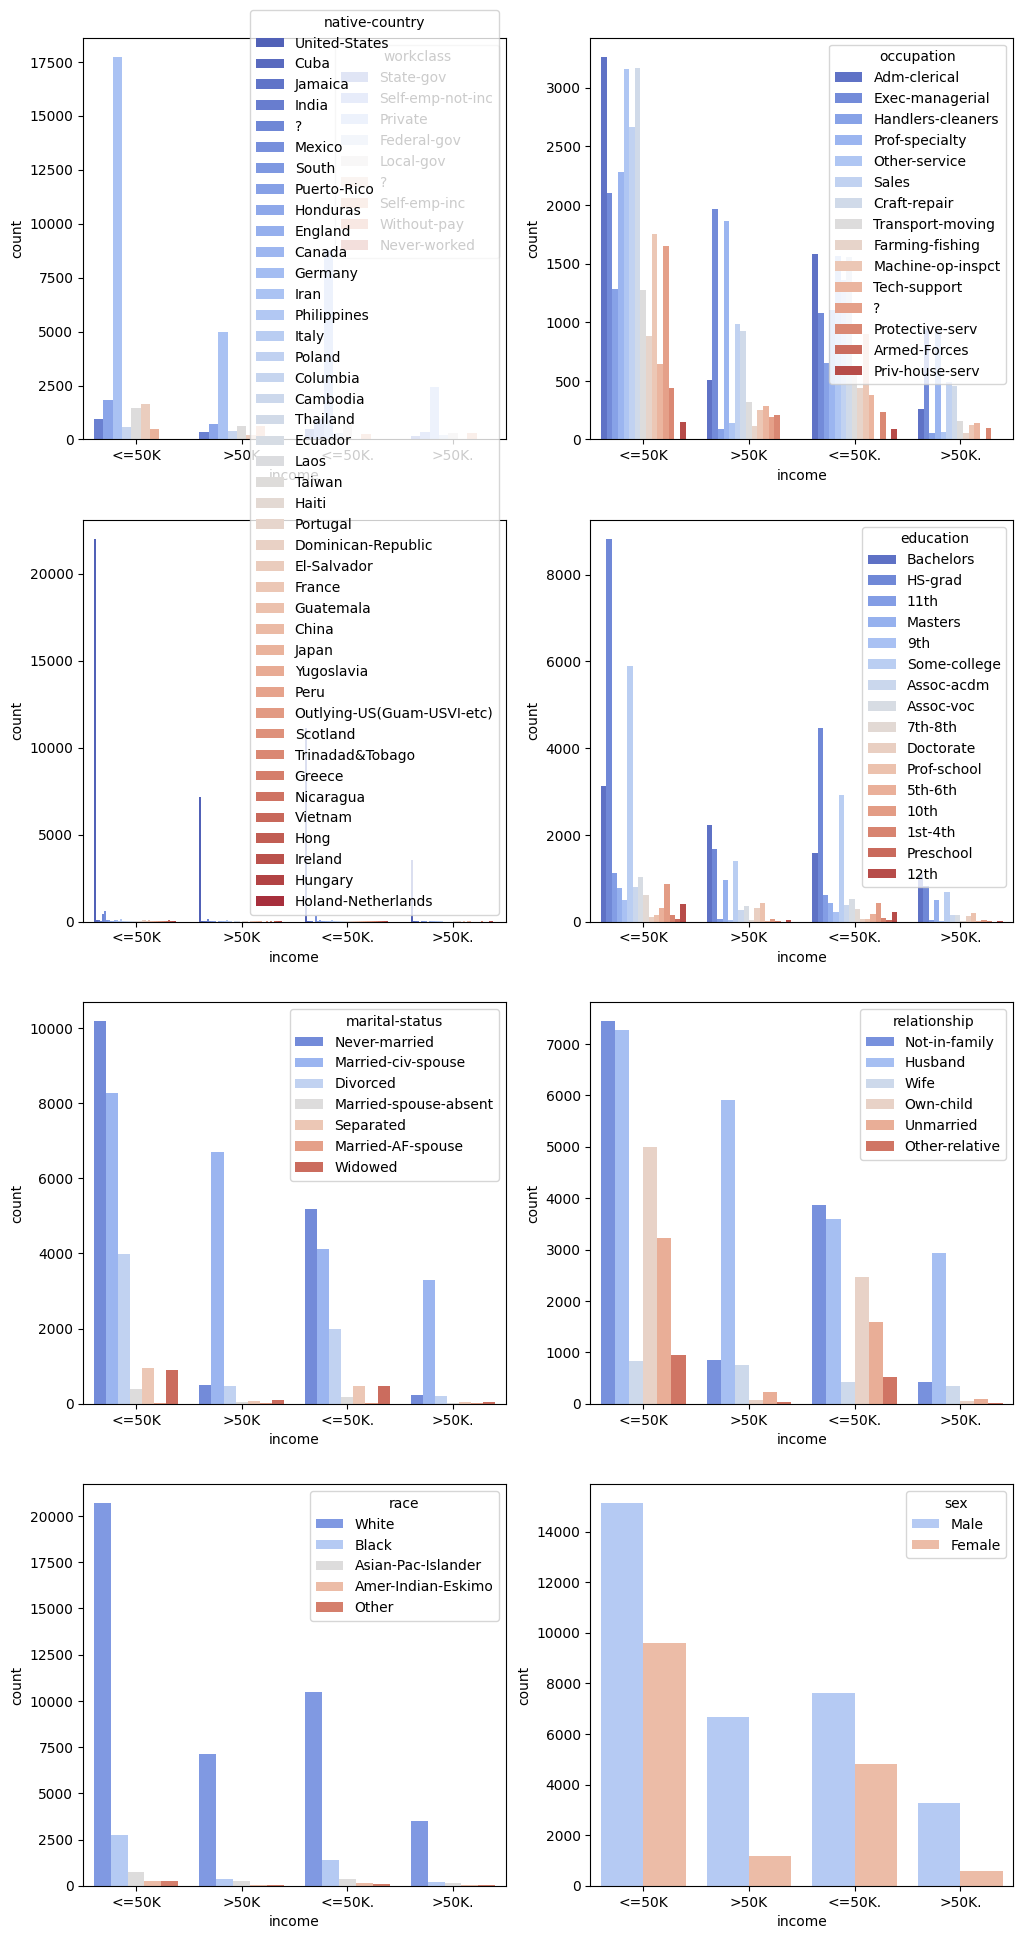

In [20]:
# create a figure with 8 subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 24))

sns.countplot(x='income', palette='coolwarm', hue='workclass', data=data, ax=axes[0][0])
sns.countplot(x='income', palette='coolwarm', hue='occupation', data=data, ax=axes[0][1])
sns.countplot(x='income', palette='coolwarm', hue='native-country', data=data, ax=axes[1][0])
sns.countplot(x='income', palette='coolwarm', hue='education', data=data, ax=axes[1][1])
sns.countplot(x='income', palette='coolwarm', hue='marital-status', data=data, ax=axes[2][0])
sns.countplot(x='income', palette='coolwarm', hue='relationship', data=data, ax=axes[2][1])
sns.countplot(x='income', palette='coolwarm', hue='race', data=data, ax=axes[3][0])
sns.countplot(x='income', palette='coolwarm', hue='sex', data=data, ax=axes[3][1])


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

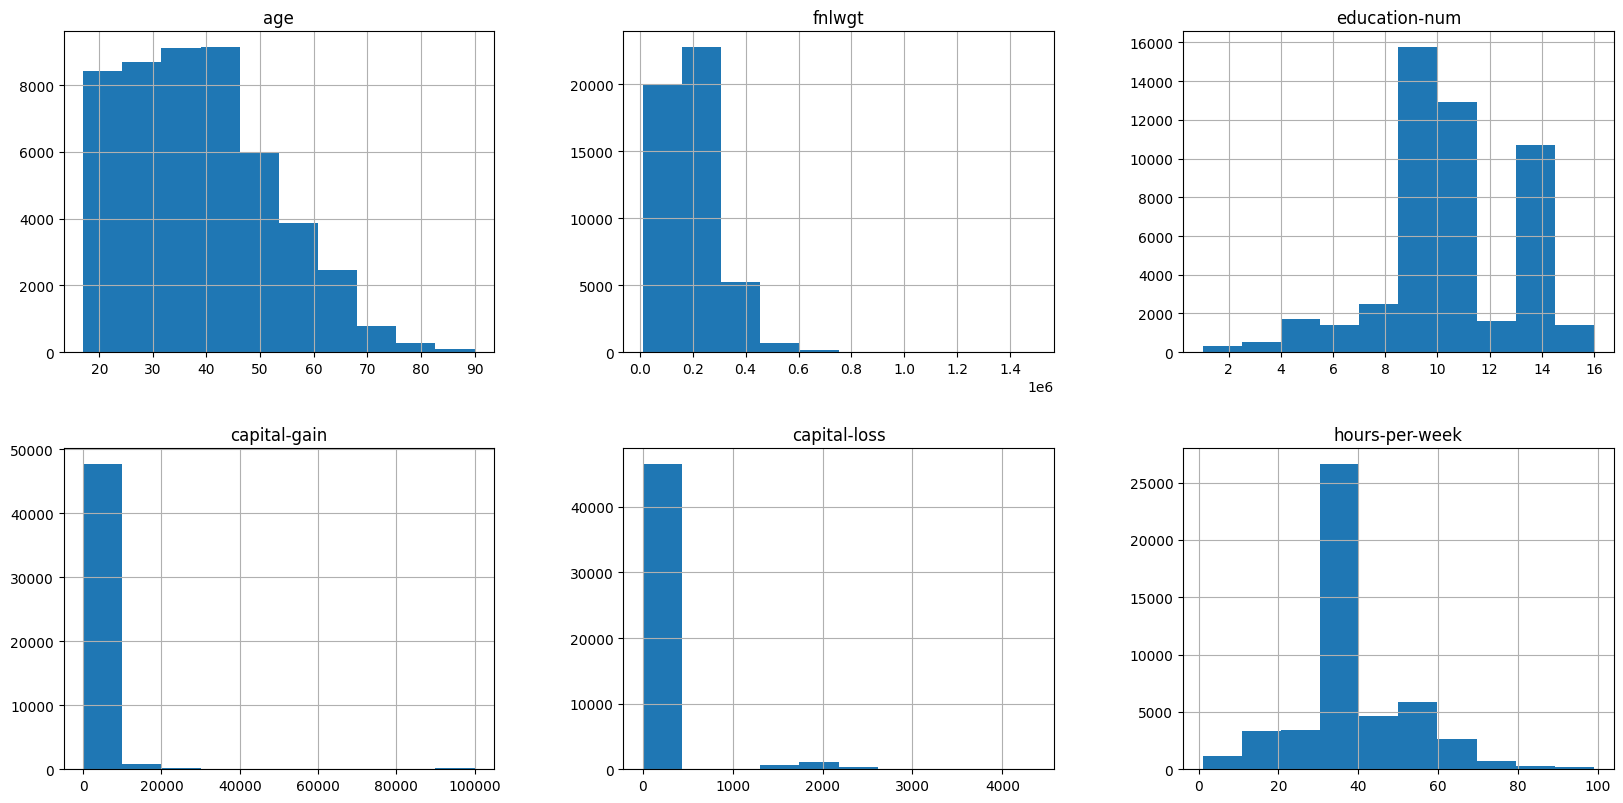

In [21]:
data.hist(figsize=(20,15), layout=(3,3), sharex=False) # for numerical data


age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

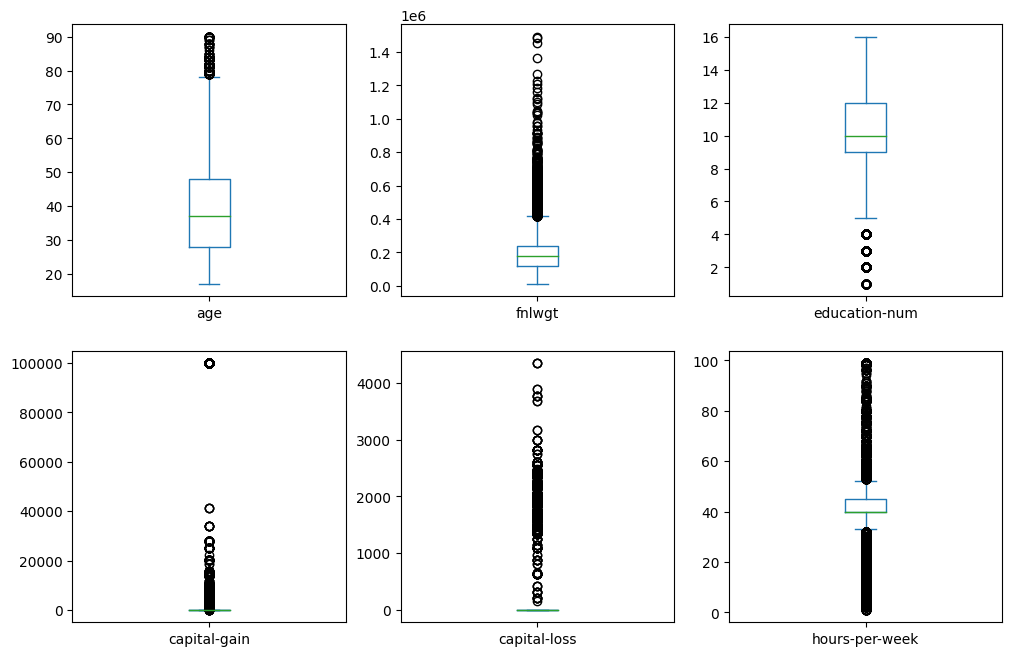

In [22]:
# to identify outliers
data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True) # for numerical data

# outliers will make boased predictions. so we have to remove them.


Since we have so many utliers, we have to remove them.

In [23]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# **Data Preprocessing**

**Handling missing values**

In [24]:
# replace "?" with mode

data['workclass'] = data['workclass'].replace('?', 'Private')
data['occupation'] = data['occupation'].replace('?', 'Prof-specialty')
data['native-country'] = data['native-country'].replace('?', 'United-States')


In [25]:
data.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Feature Engineering**

(for categorical data)

In [26]:
# education
# there are 16 categories

data.education = data.education.replace(['Preschool', '1st-4th', '5th-6th','7th-8th', '9th', '10th', '11th',  '12th'], 'School')
data.education = data.education.replace('HS-grad', 'High School')
data.education = data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher Education')
data.education = data.education.replace('Bachelors', 'Under Graduation')
data.education = data.education.replace('Masters', 'Graduation')
data.education = data.education.replace('Doctorate', 'Doc')


data['education'].value_counts()


High School         15784
Higher Education    15374
Under Graduation     8025
School               6408
Graduation           2657
Doc                   594
Name: education, dtype: int64

In [27]:
# marital-status
# there are 7 categories

data['marital-status'] = data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
data['marital-status'] = data['marital-status'].replace('Never-married', 'Unmarried')
data['marital-status'] = data['marital-status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'Other')


data['marital-status'].value_counts()


Married      22416
Unmarried    16117
Other        10309
Name: marital-status, dtype: int64

In [28]:
# income
# there are 4 categories

data['income'] = data['income'].replace(['<=50K', '<=50K.'], '<=50K') # less than or equals to 50k
data['income'] = data['income'].replace(['>50K', '>50K.'], '>50K') # greater than 50k


data['income'].value_counts()


<=50K    37155
>50K     11687
Name: income, dtype: int64

In [29]:
# income
# there are 2 categories
# converting them into neumeruc data. 0 & 1

data['income'] = data['income'].replace('<=50K', 0) # less than or equals to 50k
data['income'] = data['income'].replace('>50K', 1) # greater than 50k


data['income'].value_counts()


0    37155
1    11687
Name: income, dtype: int64

In [30]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Under Graduation,13,Unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Under Graduation,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,High School,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Under Graduation,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Graduation,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,School,5,Other,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,High School,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Graduation,14,Unmarried,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Under Graduation,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [31]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# If you want to see the duplicate rows themselves, you can use boolean indexing
duplicate_data = data[duplicate_rows]

# If you want to count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 48


**Handling outliers**

(for numerical data)

age    Axes(0.125,0.653529;0.227941x0.226471)
dtype: object

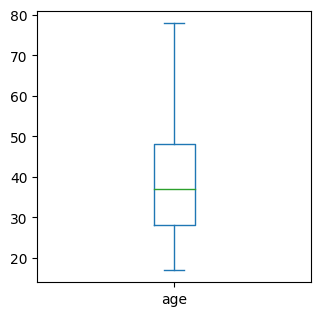

In [32]:
# Handling the outliers in the age column

# Calculate the IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the nearest non-outlier value
data['age'] = np.where(data['age'] < lower_bound, lower_bound, data['age'])
data['age'] = np.where(data['age'] > upper_bound, upper_bound, data['age'])


data['age'].plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

education-num    Axes(0.125,0.653529;0.227941x0.226471)
dtype: object

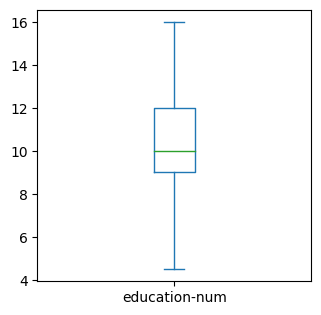

In [33]:
# Handling the outliers in the education-num column

# Calculate the IQR
Q1 = data['education-num'].quantile(0.25)
Q3 = data['education-num'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the nearest non-outlier value
data['education-num'] = np.where(data['education-num'] < lower_bound, lower_bound, data['education-num'])
data['education-num'] = np.where(data['education-num'] > upper_bound, upper_bound, data['education-num'])


data['education-num'].plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

hours-per-week    Axes(0.125,0.653529;0.227941x0.226471)
dtype: object

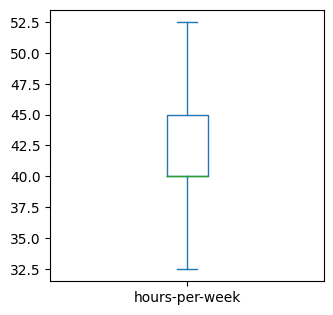

In [34]:
# Handling the outliers in the hours-per-week column

# Calculate the IQR
Q1 = data['hours-per-week'].quantile(0.25)
Q3 = data['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the nearest non-outlier value
data['hours-per-week'] = np.where(data['hours-per-week'] < lower_bound, lower_bound, data['hours-per-week'])
data['hours-per-week'] = np.where(data['hours-per-week'] > upper_bound, upper_bound, data['hours-per-week'])


data['hours-per-week'].plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

fnlwgt    Axes(0.125,0.653529;0.227941x0.226471)
dtype: object

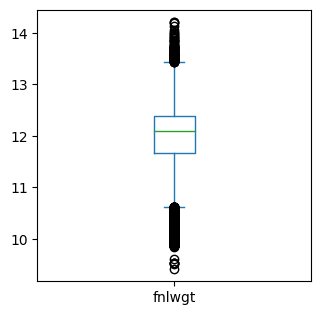

In [35]:
# Handling the outliers in the fnlwgt column

# Apply log transformation
data['fnlwgt'] = np.log(data['fnlwgt'])

data['fnlwgt'].plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

capital-gain    Axes(0.125,0.653529;0.227941x0.226471)
dtype: object

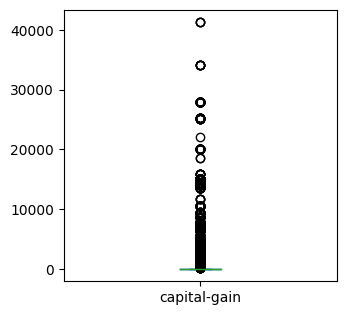

In [36]:
# Handling the outliers in the capital-gain column

data = data[data['capital-gain'] <= 50000]

data['capital-gain'].plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

In [37]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,48598.000000,48598.000000,48598.000000,48598.000000,48598.000000,48598.000000,48598.000000
mean,38.578481,11.983007,10.107484,582.412136,87.941644,41.166046,0.235462
std,13.631952,0.630953,2.448237,2536.651465,403.967187,6.171950,0.424292
min,17.000000,9.416134,4.500000,0.000000,0.000000,32.500000,0.000000
25%,28.000000,11.674623,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,12.090746,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.378819,12.000000,0.000000,0.000000,45.000000,0.000000
max,78.000000,14.214555,16.000000,41310.000000,4356.000000,52.500000,1.000000


**Removing duplicates**

In [38]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 69


In [39]:
# Remove duplicate rows
data = data.drop_duplicates()

# Verify that duplicate rows have been removed
num_duplicates =  data.duplicated().sum()
print("Number of duplicate rows after removal:", num_duplicates)

Number of duplicate rows after removal: 0


# **Data Visualization**

(for processed data.)

age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
income                   Axes(0.125,0.11;0.227941x0.226471)
dtype: object

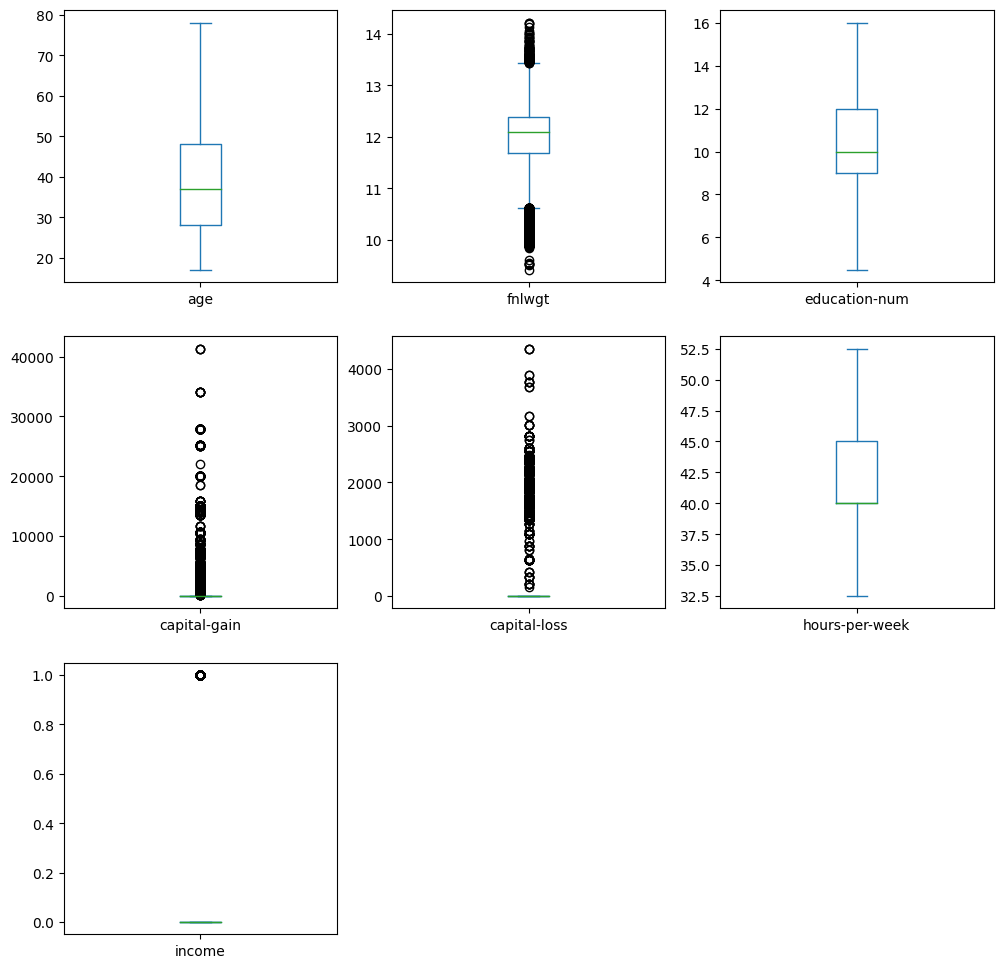

In [40]:
data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True) # for numerical data


In [41]:
data.corr() # for numerical data

# values greater than 0 - positive correlation (X increase = Y increase)
# values closer to +1 - stronger positive correlation

# values less than 0 - negative correlation (X increate = Y decrease)
# values closer to 11 - stronger negative correlation

# values near 0 - no correlation


<ipython-input-41-1ad4b2e0f1e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # for numerical data


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.062471,0.038036,0.113505,0.057538,0.090757,0.228659
fnlwgt,-0.062471,1.000000,-0.030176,-0.000598,0.000588,-0.024639,0.001437
education-num,0.038036,-0.030176,1.000000,0.148862,0.085145,0.177912,0.334121
capital-gain,0.113505,-0.000598,0.148862,1.000000,-0.050058,0.103663,0.309316
capital-loss,0.057538,0.000588,0.085145,-0.050058,1.000000,0.064593,0.150681
hours-per-week,0.090757,-0.024639,0.177912,0.103663,0.064593,1.000000,0.265672
income,0.228659,0.001437,0.334121,0.309316,0.150681,0.265672,1.000000


<ipython-input-42-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

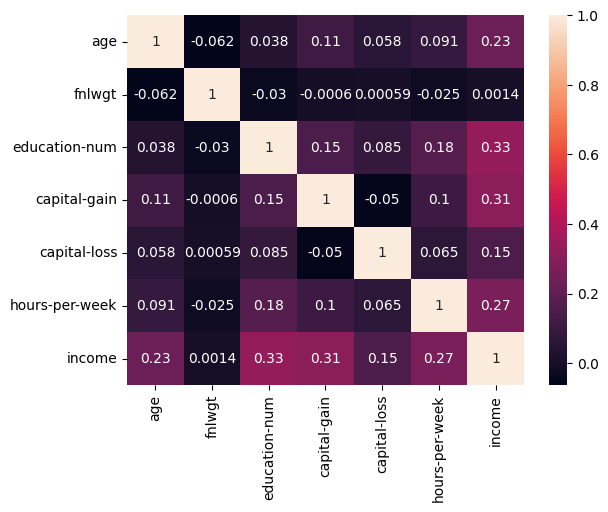

In [42]:
sns.heatmap(data.corr(), annot=True)


# **Model Building Process**

In [43]:
A = data.drop(['income'], axis=1) # independent variables(X)
B = data['income'] # dependent variable(Y)

In [44]:
# feature scalling

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [45]:
data1 = data.copy()

data1 = data1.apply(LabelEncoder().fit_transform) # to convert categorical data into numerical data
data1.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3449,5,9,2,0,1,4,1,27,0,8,38,0
1,33,5,3775,5,9,0,3,0,4,1,0,0,0,38,0
2,21,3,18293,2,5,1,5,1,4,1,0,0,8,38,0
3,36,3,19944,4,3,0,5,0,2,1,0,0,8,38,0
4,11,3,25341,5,9,0,9,5,2,0,0,0,8,4,0


In [46]:
ss = StandardScaler().fit(data1.drop('income', axis=1))

In [47]:
A = ss.transform(data1.drop('income', axis=1))
B = data['income']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state=40)


In [49]:
data1['income'].value_counts()

0    37092
1    11437
Name: income, dtype: int64

In [50]:
# apply SMOTE to the training data to balance the dataset

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=40)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# **Naive Bayes Classification**

In [51]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

model_nb = naive_bayes.fit(X_train_smote, y_train_smote)
prediction_nb = model_nb.predict(X_test)

print('Accuracy on training data: {:.3f}'.format(naive_bayes.score(X_train_smote, y_train_smote)))
print('Accuracy on testing data: {:.3f}'.format(naive_bayes.score(X_test, y_test)))


Accuracy on training data: 0.776
Accuracy on testing data: 0.803


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Confusion Martix')
print(confusion_matrix(y_test, prediction_nb))

# [tp   fn]
# [fp   tn]

print(" ")
print(" ")
print(" ")

print('Classification Report')
print(classification_report(y_test, prediction_nb))


Confusion Martix
[[9325 1782]
 [1092 2360]]
 
 
 
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     11107
           1       0.57      0.68      0.62      3452

    accuracy                           0.80     14559
   macro avg       0.73      0.76      0.74     14559
weighted avg       0.82      0.80      0.81     14559



In [53]:
# for class 0 (<=50k)

# Precision = tp/(tp+fp)
print('Precision = ', 10224/(10224+1778))

# Recall = tp/(tp+fn)
print('Recall = ', 10224/(10224+884))


Precision =  0.8518580236627229
Recall =  0.920417716960749


In [54]:
# for class 1 (>50k)

# Precision = tp/(tp+fp)
print('Precision = ', 1767/(1767+884))

# Recall = tp/(tp+fn)
print('Recall = ', 1767/(1767+1778))


Precision =  0.6665409279517164
Recall =  0.4984485190409027


# **Random Forest Classifier**

Random forest classification is less affected by outliers.

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 10)

model_rfc = rfc.fit(X_train_smote, y_train_smote)
prediction_rfc = model_rfc.predict(X_test)

print('Accuracy on training data: {:,.3f}'.format(rfc.score(X_train_smote, y_train_smote)))
print('Accuracy on testing data: {:,.3f}'.format(rfc.score(X_test, y_test)))


Accuracy on training data: 0.863
Accuracy on testing data: 0.811


In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Confusion Martix')
print(confusion_matrix(y_test, prediction_rfc))

# [tp   fn]
# [fp   tn]

print(" ")
print(" ")
print(" ")

print('Classification Report')
print(classification_report(y_test, prediction_rfc))


Confusion Martix
[[8876 2231]
 [ 518 2934]]
 
 
 
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.80      0.87     11107
           1       0.57      0.85      0.68      3452

    accuracy                           0.81     14559
   macro avg       0.76      0.82      0.77     14559
weighted avg       0.86      0.81      0.82     14559



In [57]:
# for class 0 (<=50k)

# Precision = tp/(tp+fp)
print('Precision = ', 10329/(10329+1407))

# Recall = tp/(tp+fn)
print('Recall = ', 10329/(10329+779))


Precision =  0.8801124744376279
Recall =  0.9298703637018365


In [58]:
# for class 1 (>50k)

# Precision = tp/(tp+fp)
print('Precision = ', 2138/(2138+779))

# Recall = tp/(tp+fn)
print('Recall = ', 2138/(2138+1407))


Precision =  0.7329448063078505
Recall =  0.6031029619181947


# **Learning Curve**

In [59]:
from sklearn.model_selection import learning_curve

# Function to calculate the learning curve
def calculate_learning_curve(estimator, X_train, y_train, X_test, y_test, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train_smote, y_train_smote, train_sizes=train_sizes, cv=cv)
    return train_sizes, train_scores, test_scores

# Function to plot the learning curve
def plot_learning_curve(train_sizes, train_scores, test_scores, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing score")
    plt.legend(loc="best")
    return plt


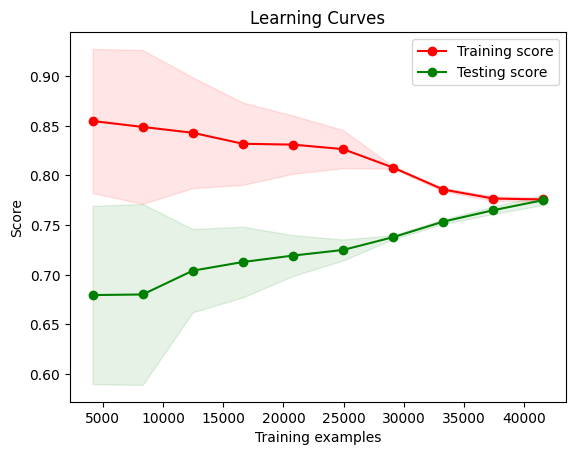

In [60]:
# For Naive Bayes Classification

# calculate learning curve
train_sizes, train_scores, test_scores = calculate_learning_curve(naive_bayes, X_train, y_train, X_test, y_test)

# plot learning curve
title = "Learning Curves"
plot_learning_curve(train_sizes, train_scores, test_scores, title)

plt.show()


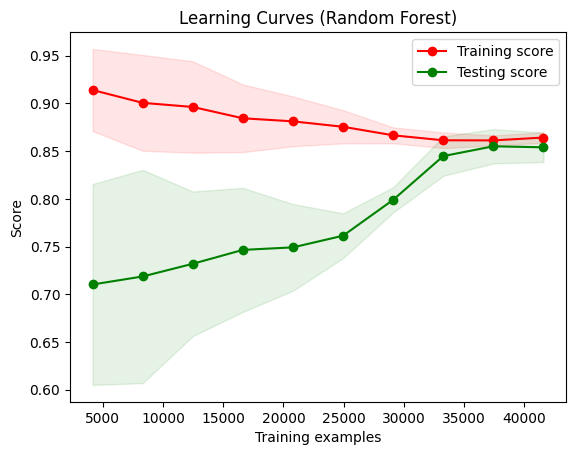

In [61]:
# For Random Forest Classification

# Calculate learning curve
train_sizes, train_scores, test_scores = calculate_learning_curve(rfc, X_train, y_train, X_test, y_test)

# Plot learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(train_sizes, train_scores, test_scores, title)

plt.show()


# **ROC Curve**

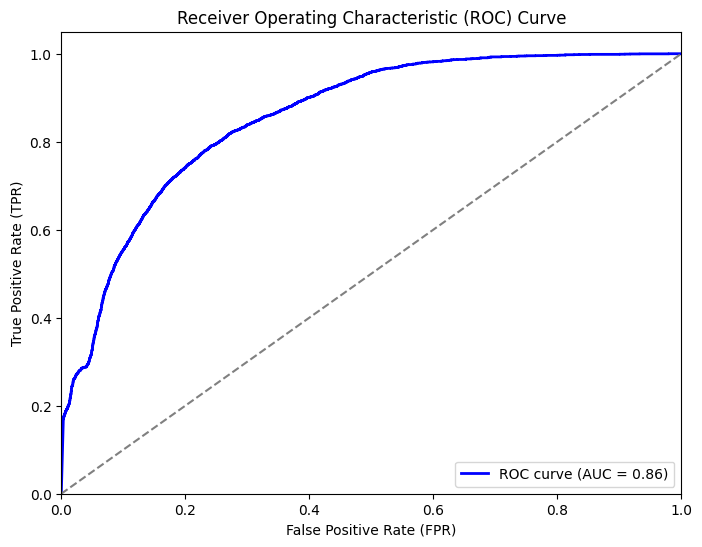

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for the Naive Bayes Classification

# Predict probabilities on the test set
probs = model_nb.predict_proba(X_test)[:, 1]  # Probabilities of positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute AUC-ROC score
auc_score = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

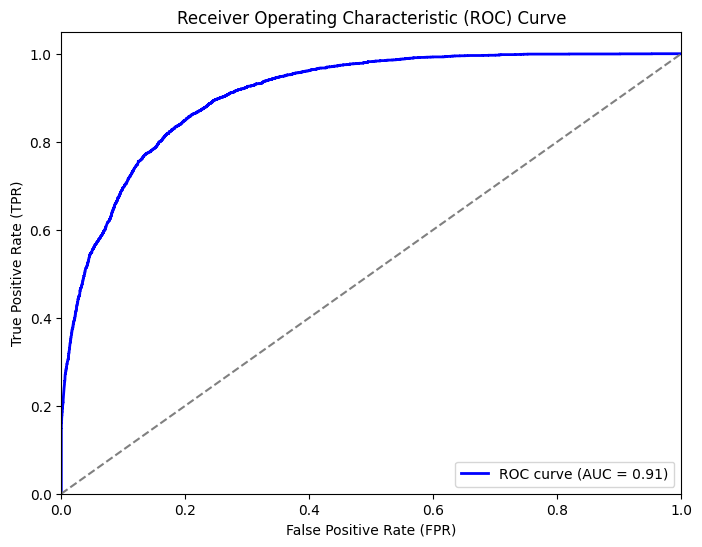

In [63]:
# ROC Curve for the Random Forest Classification

# Predict probabilities on the test set
probs = model_rfc.predict_proba(X_test)[:, 1]  # Probabilities of positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute AUC-ROC score
auc_score = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()